## import tensorflow and other packages

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Define initial input x and output y

[-2.         -1.87755102 -1.75510204 -1.63265306 -1.51020408 -1.3877551
 -1.26530612 -1.14285714 -1.02040816 -0.89795918 -0.7755102  -0.65306122
 -0.53061224 -0.40816327 -0.28571429 -0.16326531 -0.04081633  0.08163265
  0.20408163  0.32653061  0.44897959  0.57142857  0.69387755  0.81632653
  0.93877551  1.06122449  1.18367347  1.30612245  1.42857143  1.55102041
  1.67346939  1.79591837  1.91836735  2.04081633  2.16326531  2.28571429
  2.40816327  2.53061224  2.65306122  2.7755102   2.89795918  3.02040816
  3.14285714  3.26530612  3.3877551   3.51020408  3.63265306  3.75510204
  3.87755102  4.        ]


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


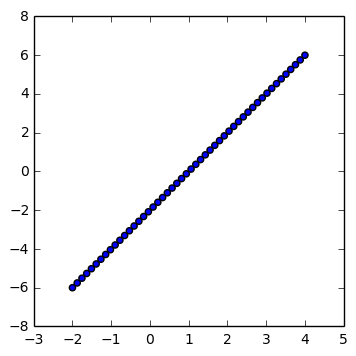

In [4]:
num_examples = 50
x=np.linspace(-2, 4, num_examples)
y=np.linspace(-6, 6, num_examples)
print x
plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.show()

## Generate random pertubation 

In [5]:
randnum=np.random.random([num_examples])
print randnum

[ 0.69468812  0.76433985  0.48907605  0.20173005  0.81662296  0.28544471
  0.22351182  0.48968533  0.83867993  0.72399452  0.12300451  0.70340524
  0.86799523  0.98513867  0.04058264  0.23750989  0.20795213  0.72676881
  0.50832674  0.50872813  0.84726839  0.84757519  0.82978698  0.6304305
  0.0112158   0.78987729  0.73265985  0.28673174  0.66022837  0.33783113
  0.68723565  0.66386675  0.08096569  0.12619504  0.16989061  0.1244708
  0.42372693  0.72509119  0.14952221  0.51519253  0.93420552  0.42191764
  0.16374122  0.16174883  0.4072154   0.94776896  0.99793733  0.64637544
  0.0657503   0.17723147]


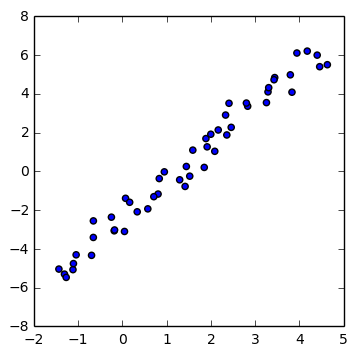

In [6]:
x += randnum  #an 1-d array with random numbers
y += np.random.random([num_examples])
plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.show()

## Add a constant element to input array

In [7]:
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32)
print x_with_bias

[[ 1.         -1.30531192]
 [ 1.         -1.11321115]
 [ 1.         -1.26602602]
 [ 1.         -1.43092299]
 [ 1.         -0.6935811 ]
 [ 1.         -1.10231042]
 [ 1.         -1.0417943 ]
 [ 1.         -0.65317184]
 [ 1.         -0.18172823]
 [ 1.         -0.17396466]
 [ 1.         -0.6525057 ]
 [ 1.          0.05034401]
 [ 1.          0.33738297]
 [ 1.          0.57697541]
 [ 1.         -0.24513164]
 [ 1.          0.07424458]
 [ 1.          0.1671358 ]
 [ 1.          0.80840147]
 [ 1.          0.71240836]
 [ 1.          0.83525872]
 [ 1.          1.29624796]
 [ 1.          1.41900373]
 [ 1.          1.52366459]
 [ 1.          1.44675708]
 [ 1.          0.94999129]
 [ 1.          1.85110176]
 [ 1.          1.91633332]
 [ 1.          1.59285414]
 [ 1.          2.08879972]
 [ 1.          1.88885152]
 [ 1.          2.36070514]
 [ 1.          2.45978522]
 [ 1.          1.99933302]
 [ 1.          2.16701126]
 [ 1.          2.33315587]
 [ 1.          2.4101851 ]
 [ 1.          2.83189011]
 

## Train a neural network with Gradient Descent 
The objective is minimizing L2 loss

In [8]:
losses = []
training_steps = 50
learning_rate = 0.002

with tf.Session() as sess:
  # Set up all the tensors, variables, and operations.
  input = tf.constant(x_with_bias)
  target = tf.constant(np.transpose([y]).astype(np.float32))
  weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))
  
  tf.initialize_all_variables().run()

  # yhat is a vector in this case
  yhat = tf.matmul(input, weights)
  yerror = tf.sub(yhat, target)
  loss = tf.nn.l2_loss(yerror)
  
  update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
  for _ in range(training_steps):
    update_weights.run()
    losses.append(loss.eval())
    #print _  #It takes on value from 0 to 49
    #print losses  #this shows losses array keep increasing in size: [18] , [18, 13],...

  # Training is done, get the final values for the graphs
  betas = weights.eval()
  yhat = yhat.eval()

## Show the actual and predicted data points

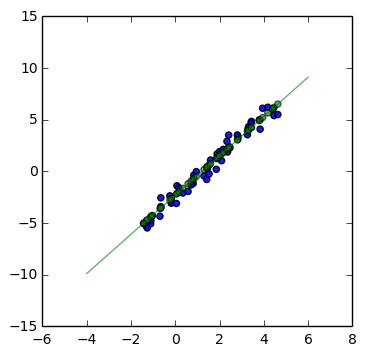

In [9]:
plt.figure(figsize=(4,4))

plt.scatter(x, y, alpha=.9)  #plot original x and y
plt.scatter(x, np.transpose(yhat)[0], c="g", alpha=.6) #plot x and yhat

x_range = (-4, 6)
plt.plot(x_range, [betas[0] + a * betas[1] for a in x_range], "g", alpha=0.6)

plt.show()

## Plot the prediction error over time

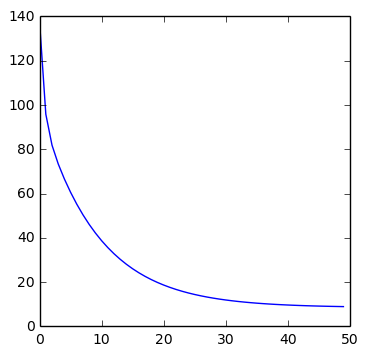

In [10]:
# Show the loss over time.
plt.figure(figsize=(4,4))

plt.plot(range(0, training_steps), losses)
#plt.set_ylabel("Loss")
#plt.set_xlabel("Training steps")

plt.show()

## Exercise: Build a neural network to predict room occupancy

In [11]:
import csv

# Split data into inputs (5 cols) and output (1 col)
def load_data(filename):
    x=[]
    target=[]
    a=[]
    with open(filename) as csv_file:
        data_file = csv.reader(csv_file)
        for row in data_file:
            a.append(row)
    print a[0]
    np_a=np.array(a)
    x=np_a[1:,:-1].astype(np.float32)  #read after first row
    target=np_a[1:,-1].astype(np.float32)
    return x, target

In [12]:
room_X, room_y=load_data('data/room/train.csv')

['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


In [13]:
print len(room_X)
print len(room_y)

8143
8143


In [14]:
#*** Inspect data
n_samples=len(room_X)
n_features = len(room_X[0])
print n_samples
print n_features

8143
5


In [15]:
print room_X[0], room_y[0]

[  2.31800003e+01   2.72719994e+01   4.26000000e+02   7.21250000e+02
   4.79298783e-03] 1.0


In [16]:
losses = []
training_steps = n_samples
learning_rate = 0.01

with tf.Session() as sess:
  # Set up all the tensors, variables, and operations.
  input = tf.constant(room_X)
  target = tf.constant(np.transpose([room_y]).astype(np.float32))
  weights = tf.Variable(tf.random_normal([5, 1], 0, 0.1))
  
  tf.initialize_all_variables().run()

  # yhat is a matrix 
  yhat = tf.matmul(input, weights)
 
  # loss is a matrix
  lossDistribution = tf.nn.sigmoid_cross_entropy_with_logits(yhat, target, name="loss")
  
  # take the mean of the lossDistribution vector
  lossAvg = tf.reduce_mean(lossDistribution)

  update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(lossAvg)
  
  for _ in range(training_steps):
    update_weights.run()
    losses.append(lossAvg.eval())        
    
    #print _  #It takes on value from 0 to 49
    #print losses  #this shows losses array keep increasing in size: [18] , [18, 13],...

  # Training is done, get the final values for the graphs
  finalWeightsBetas = weights.eval()
  yhat = yhat.eval()
  finalLossDistribution = lossDistribution.eval()

In [17]:
print yhat

[[ -9.32804585]
 [ -6.64313936]
 [-10.12156296]
 ..., 
 [-13.14401722]
 [-10.09729576]
 [  4.59316492]]


In [18]:
print finalWeightsBetas

[[-16.84068871]
 [ -6.88164139]
 [  1.0107038 ]
 [  0.19155027]
 [ -0.04718706]]


In [19]:
print finalLossDistribution

[[  9.32813454e+00]
 [  6.64444160e+00]
 [  1.01216030e+01]
 ..., 
 [  1.31440191e+01]
 [  1.00973368e+01]
 [  1.00698778e-02]]


In [20]:
print losses

[789.47266, 334.03677, 160.24374, 627.5849, 72.658607, 61.194012, 31.808559, 30.265984, 29.010735, 27.743101, 26.483156, 25.223295, 23.963549, 22.704079, 21.445812, 20.194349, 18.930952, 17.723143, 16.658493, 18.824482, 30.051092, 181.03429, 377.53107, 474.97122, 33.004196, 31.329283, 30.069895, 28.810574, 27.551325, 26.292164, 25.033403, 23.77598, 22.528273, 21.265467, 20.070555, 18.928513, 18.654415, 18.22019, 28.255669, 208.44014, 611.05084, 59.11417, 60.572044, 88.997482, 128.33411, 530.06171, 55.657677, 43.60556, 42.348003, 41.081902, 39.822655, 38.563583, 37.304638, 36.045841, 34.787247, 33.528885, 32.270676, 31.012621, 29.754728, 28.497103, 27.23995, 25.983778, 24.733503, 23.507786, 22.3475, 21.264435, 21.747021, 23.006727, 23.611254, 31.039991, 21.343451, 30.974005, 46.28936, 373.97656, 485.28079, 29.938646, 28.17234, 26.955231, 25.702318, 24.543949, 23.359936, 22.906746, 20.787708, 19.791063, 18.68371, 23.066298, 30.651405, 20.393946, 28.913679, 23.395157, 157.08276, 639.29657

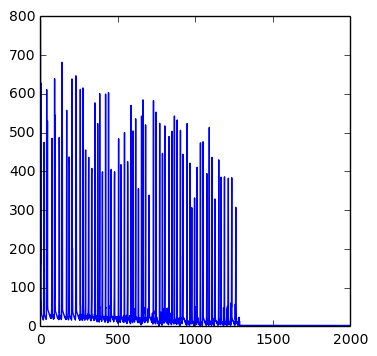

In [21]:
plt.figure(figsize=(4,4))

plt.plot(range(0, 1999), losses[0:1999])